# Workshop 1: House Pricing Regression
In this workshop you will need to train a regression neural network to estimate the pricing of houses of California. The main blocks of the workshop are:

- Get the data from Keras repository and visualize it.
- Pre-process the data.
- Design the network.
- Train the network.
- Evaluate the model.

[Info of the data](https://www.kaggle.com/datasets/camnugent/california-housing-prices))

In [29]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from matplotlib import pyplot as plt

tf.random.set_seed(1234)

# 1. Get the data (Already in Colab)

In [30]:
TRAIN_DATA_PATH = '/content/sample_data/california_housing_train.csv'
TEST_DATA_PATH = '/content/sample_data/california_housing_test.csv'
TARGET_NAME = 'median_house_value'

In [31]:
train_data = pd.read_csv(TRAIN_DATA_PATH)
test_data = pd.read_csv(TEST_DATA_PATH)

In [32]:
train_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [33]:
train_data.shape, test_data.shape

((17000, 9), (3000, 9))

In [34]:
x_train, y_train = train_data.drop(TARGET_NAME, axis=1), train_data[TARGET_NAME]
x_test, y_test = test_data.drop(TARGET_NAME, axis=1), test_data[TARGET_NAME]

In [35]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((17000, 8), (17000,), (3000, 8), (3000,))

# 2. Pre-process the data.

In [36]:
standard_scaler = StandardScaler()
x_train_scaled = pd.DataFrame(
    standard_scaler.fit_transform(x_train),
    columns=x_train.columns
)
x_test_scaled = pd.DataFrame(
    standard_scaler.transform(x_test),
    columns = x_test.columns
)

In [37]:
x_train_scaled.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,2.619365,-0.671520,-1.079671,1.361695,1.764204,-0.361184,-0.075998,-1.252543
1,2.539569,-0.573264,-0.761872,2.296608,3.230441,-0.261865,-0.099404,-1.081483
2,2.494683,-0.905463,-0.920772,-0.882462,-0.866956,-0.955354,-0.999252,-1.170105
3,2.489696,-0.928857,-1.159121,-0.524186,-0.480230,-0.796793,-0.715774,-0.362600
4,2.489696,-0.961609,-0.682422,-0.545747,-0.506328,-0.701830,-0.622148,-1.026454


# 3. Design the network.

In [38]:
def create_model():
  model = Sequential([
      Dense(32, input_dim=8, activation='relu'),
      Dense(64, activation='relu'),
      Dense(32, activation='relu'),
      Dense(1, activation='linear')
    ])
  return model

In [39]:
model = create_model()
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_48 (Dense)            (None, 32)                288       
                                                                 
 dense_49 (Dense)            (None, 64)                2112      
                                                                 
 dense_50 (Dense)            (None, 32)                2080      
                                                                 
 dense_51 (Dense)            (None, 1)                 33        
                                                                 
Total params: 4,513
Trainable params: 4,513
Non-trainable params: 0
_________________________________________________________________


In [40]:
model.compile(
    loss='mse', #En lugar de ser la Categorical Cross Entropy es la Min Squared Error.
    optimizer=Adam(learning_rate=1e-3), 
    metrics=['mse']
)

# 4. Train the network.

In [41]:
history = model.fit(
    x_train_scaled.values, 
    y_train.values, 
    epochs=10, 
    batch_size=64,
    validation_split=0.2
)

Epoch 1/10
213/213 [==============================] - 2s 5ms/step - loss: 51124641792.0000 - mse: 51124641792.0000 - val_loss: 76524830720.0000 - val_mse: 76524830720.0000
Epoch 2/10
213/213 [==============================] - 1s 4ms/step - loss: 44920918016.0000 - mse: 44920918016.0000 - val_loss: 68496617472.0000 - val_mse: 68496617472.0000
Epoch 3/10
213/213 [==============================] - 1s 5ms/step - loss: 22892500992.0000 - mse: 22892500992.0000 - val_loss: 52369207296.0000 - val_mse: 52369207296.0000
Epoch 4/10
213/213 [==============================] - 1s 5ms/step - loss: 13906859008.0000 - mse: 13906859008.0000 - val_loss: 44761149440.0000 - val_mse: 44761149440.0000
Epoch 5/10
213/213 [==============================] - 1s 4ms/step - loss: 12209518592.0000 - mse: 12209518592.0000 - val_loss: 38055899136.0000 - val_mse: 38055899136.0000
Epoch 6/10
213/213 [==============================] - 1s 4ms/step - loss: 10779679744.0000 - mse: 10779679744.0000 - val_loss: 31486298112.0

In [42]:
def plot_history(history, key):
  plt.plot(history.history[key])
  plt.plot(history.history['val_'+key])
  plt.xlabel("Epochs")
  plt.ylabel(key)
  plt.legend([key, 'val_'+key])
  plt.show()

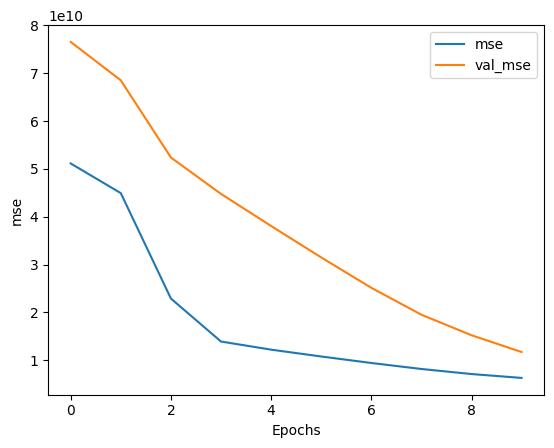

In [43]:
# Loss: MSE | Learnin Rate: 1e-03
plot_history(history, 'mse')

Epoch 1/10
213/213 [==============================] - 2s 4ms/step - loss: 24059758592.0000 - mse: 24059758592.0000 - val_loss: 19432161280.0000 - val_mse: 19432161280.0000
Epoch 2/10
213/213 [==============================] - 1s 4ms/step - loss: 5433666048.0000 - mse: 5433666048.0000 - val_loss: 6726145536.0000 - val_mse: 6726145536.0000
Epoch 3/10
213/213 [==============================] - 1s 4ms/step - loss: 4405214208.0000 - mse: 4405214208.0000 - val_loss: 5641760768.0000 - val_mse: 5641760768.0000
Epoch 4/10
213/213 [==============================] - 1s 4ms/step - loss: 4252062464.0000 - mse: 4252062464.0000 - val_loss: 5415744512.0000 - val_mse: 5415744512.0000
Epoch 5/10
213/213 [==============================] - 1s 5ms/step - loss: 4172296960.0000 - mse: 4172296960.0000 - val_loss: 5432238080.0000 - val_mse: 5432238080.0000
Epoch 6/10
213/213 [==============================] - 1s 6ms/step - loss: 4140697344.0000 - mse: 4140697344.0000 - val_loss: 5365517312.0000 - val_mse: 5365

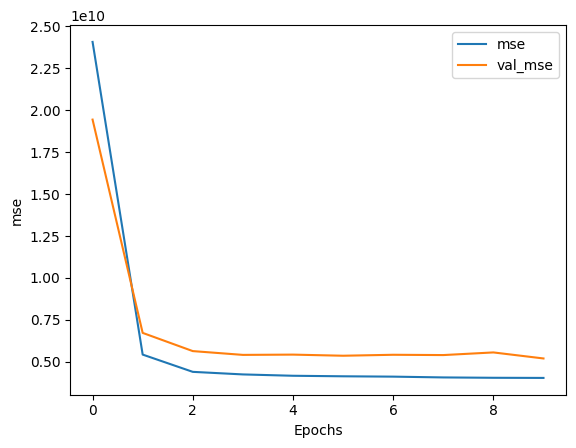

In [44]:
# Loss: MSE | Learnin Rate: 1e-02
model = create_model()
model.compile(
    loss='mse', 
    optimizer=Adam(learning_rate=1e-2), 
    metrics=['mse']
)
history = model.fit(
    x_train_scaled.values, 
    y_train.values, 
    epochs=10, 
    batch_size=64,
    validation_split=0.2
)
plot_history(history, 'mse')

Epoch 1/10
213/213 [==============================] - 2s 5ms/step - loss: 83.0094 - msle: 83.0094 - val_loss: 56.9272 - val_msle: 56.9272
Epoch 2/10
213/213 [==============================] - 1s 4ms/step - loss: 38.1131 - msle: 38.1131 - val_loss: 35.6479 - val_msle: 35.6479
Epoch 3/10
213/213 [==============================] - 1s 4ms/step - loss: 24.4213 - msle: 24.4213 - val_loss: 25.8711 - val_msle: 25.8711
Epoch 4/10
213/213 [==============================] - 1s 4ms/step - loss: 17.3406 - msle: 17.3406 - val_loss: 19.9153 - val_msle: 19.9153
Epoch 5/10
213/213 [==============================] - 1s 4ms/step - loss: 12.8947 - msle: 12.8947 - val_loss: 15.8351 - val_msle: 15.8351
Epoch 6/10
213/213 [==============================] - 1s 5ms/step - loss: 9.8544 - msle: 9.8544 - val_loss: 12.8556 - val_msle: 12.8556
Epoch 7/10
213/213 [==============================] - 1s 5ms/step - loss: 7.6676 - msle: 7.6676 - val_loss: 10.5973 - val_msle: 10.5973
Epoch 8/10
213/213 [==================

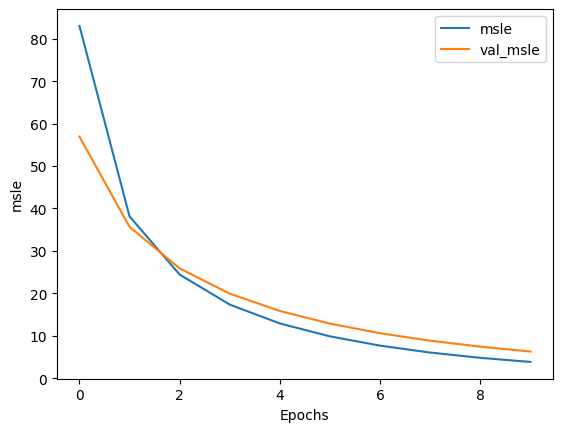

In [45]:
# Loss: MSLE | Learnin Rate: 1e-03
model = create_model()
model.compile(
    loss='msle', 
    optimizer=Adam(learning_rate=1e-3), 
    metrics=['msle']
)
history = model.fit(
    x_train_scaled.values, 
    y_train.values, 
    epochs=10, 
    batch_size=64,
    validation_split=0.2
)
plot_history(history, 'msle')

Epoch 1/10
213/213 [==============================] - 2s 5ms/step - loss: 18.7192 - msle: 18.7192 - val_loss: 5.6070 - val_msle: 5.6070
Epoch 2/10
213/213 [==============================] - 1s 4ms/step - loss: 1.5049 - msle: 1.5049 - val_loss: 1.7776 - val_msle: 1.7776
Epoch 3/10
213/213 [==============================] - 1s 4ms/step - loss: 0.4673 - msle: 0.4673 - val_loss: 0.9204 - val_msle: 0.9204
Epoch 4/10
213/213 [==============================] - 1s 4ms/step - loss: 0.3124 - msle: 0.3124 - val_loss: 0.6429 - val_msle: 0.6429
Epoch 5/10
213/213 [==============================] - 1s 4ms/step - loss: 0.2691 - msle: 0.2691 - val_loss: 0.5195 - val_msle: 0.5195
Epoch 6/10
213/213 [==============================] - 1s 4ms/step - loss: 0.2418 - msle: 0.2418 - val_loss: 0.4464 - val_msle: 0.4464
Epoch 7/10
213/213 [==============================] - 1s 4ms/step - loss: 0.2201 - msle: 0.2201 - val_loss: 0.3971 - val_msle: 0.3971
Epoch 8/10
213/213 [==============================] - 1s 4ms

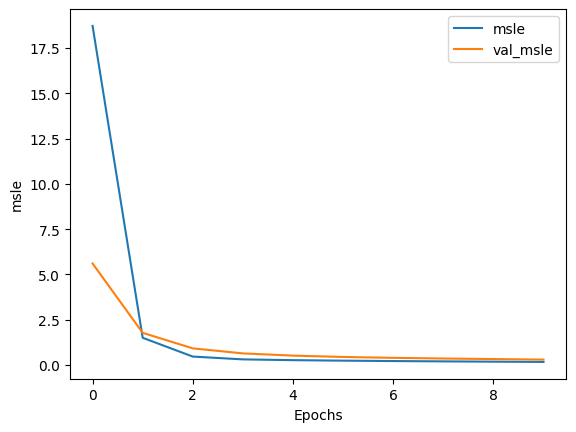

In [46]:
# Loss: MSLE | Learnin Rate: 1e-02
model = create_model()
model.compile(
    loss='msle', 
    optimizer=Adam(learning_rate=1e-2), 
    metrics=['msle']
)
history = model.fit(
    x_train_scaled.values, 
    y_train.values, 
    epochs=10, 
    batch_size=64,
    validation_split=0.2
)
plot_history(history, 'msle')

Epoch 1/10
213/213 [==============================] - 2s 5ms/step - loss: 133.5302 - msle: 133.5302 - val_loss: 150.7063 - val_msle: 150.7063
Epoch 2/10
213/213 [==============================] - 1s 4ms/step - loss: 145.3166 - msle: 145.3166 - val_loss: 150.7063 - val_msle: 150.7063
Epoch 3/10
213/213 [==============================] - 1s 4ms/step - loss: 145.3166 - msle: 145.3166 - val_loss: 150.7063 - val_msle: 150.7063
Epoch 4/10
213/213 [==============================] - 1s 4ms/step - loss: 145.3166 - msle: 145.3166 - val_loss: 150.7063 - val_msle: 150.7063
Epoch 5/10
213/213 [==============================] - 1s 4ms/step - loss: 145.3166 - msle: 145.3166 - val_loss: 150.7063 - val_msle: 150.7063
Epoch 6/10
213/213 [==============================] - 1s 4ms/step - loss: 145.3166 - msle: 145.3166 - val_loss: 150.7063 - val_msle: 150.7063
Epoch 7/10
213/213 [==============================] - 1s 4ms/step - loss: 145.3166 - msle: 145.3166 - val_loss: 150.7063 - val_msle: 150.7063
Epoch 

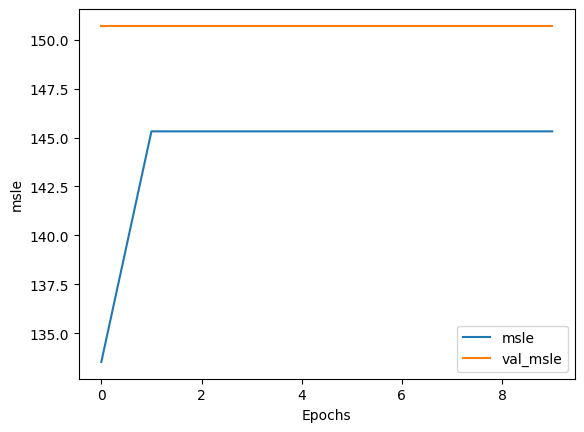

In [47]:
# Loss: MSLE | Learnin Rate: 1
model = create_model()
model.compile(
    loss='msle', 
    optimizer=Adam(learning_rate=1), 
    metrics=['msle']
)
history = model.fit(
    x_train_scaled.values, 
    y_train.values, 
    epochs=10, 
    batch_size=64,
    validation_split=0.2
)
plot_history(history, 'msle')

# Exercise 1: Re-train the model to improve its performance and evaluate it on the test set

Epoch 1/100
213/213 [==============================] - 2s 4ms/step - loss: 23056590848.0000 - mse: 23056590848.0000 - val_loss: 13202782208.0000 - val_mse: 13202782208.0000
Epoch 2/100
213/213 [==============================] - 1s 4ms/step - loss: 5157120512.0000 - mse: 5157120512.0000 - val_loss: 6601003520.0000 - val_mse: 6601003520.0000
Epoch 3/100
213/213 [==============================] - 1s 4ms/step - loss: 4369707008.0000 - mse: 4369707008.0000 - val_loss: 5572916224.0000 - val_mse: 5572916224.0000
Epoch 4/100
213/213 [==============================] - 1s 5ms/step - loss: 4226436096.0000 - mse: 4226436096.0000 - val_loss: 5389517312.0000 - val_mse: 5389517312.0000
Epoch 5/100
213/213 [==============================] - 1s 5ms/step - loss: 4146507776.0000 - mse: 4146507776.0000 - val_loss: 5438858752.0000 - val_mse: 5438858752.0000
Epoch 6/100
213/213 [==============================] - 1s 4ms/step - loss: 4117583104.0000 - mse: 4117583104.0000 - val_loss: 5383631360.0000 - val_mse

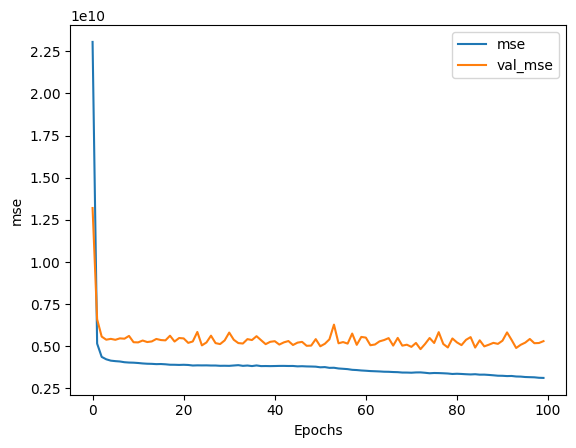

In [56]:
# Train the model


model = create_model()
model.compile(
    loss='mse', 
    optimizer=Adam(learning_rate=1e-2), 
    metrics=['mse']
)
history = model.fit(
    x_train_scaled.values, 
    y_train.values, 
    epochs=100, 
    batch_size=64,
    validation_split=0.2
)
plot_history(history, 'mse')


In [59]:
# Predict on the test set


test_data['prediction'] = model.predict(x_test_scaled)
test_data['error'] = (test_data['median_house_value'] - test_data['prediction']).abs()
test_data['error pct'] = (test_data['error'] / test_data['median_house_value']*100)







94/94 [==============================] - 0s 1ms/step


In [60]:
# Compare the results with the ground truth

print(test_data['error pct'].mean())
test_data.head(20)

23.947523270297655


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,prediction,error,error pct
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0,346241.125000,1541.125000,0.447092
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0,198028.609375,21528.609375,12.197512
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0,275797.718750,5297.718750,1.958491
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0,353032.281250,23032.281250,6.979479
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0,83450.132812,1750.132812,2.142145
5,-119.56,36.51,37.0,1018.0,213.0,663.0,204.0,1.6635,67000.0,51247.167969,15752.832031,23.511690
6,-121.43,38.63,43.0,1009.0,225.0,604.0,218.0,1.6641,67000.0,79484.796875,12484.796875,18.634025
7,-120.65,35.48,19.0,2310.0,471.0,1341.0,441.0,3.2250,166900.0,169284.000000,2384.000000,1.428400
8,-122.84,38.40,15.0,3080.0,617.0,1446.0,599.0,3.6696,194400.0,201244.546875,6844.546875,3.520857
9,-118.02,34.08,31.0,2402.0,632.0,2830.0,603.0,2.3333,164200.0,140907.890625,23292.109375,14.185207
